In [1]:
# 📦 Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# 🧠 Enter results manually from your trained models
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'Neural Network'],
    'R2': [0.299, 0.389, 0.476, 0.216, -0.538],
    'RMSE': [250.09, 235.42, 216.38, 264.58, 370.59],
    'MAE': [180.56, 170.12, 150.77, 190.83, 300.40]
})

results

,Model,R2,RMSE,MAE
0,Linear Regression,0.299,250.09,180.56
1,Decision Tree,0.389,235.42,170.12
2,Random Forest,0.476,216.38,150.77
3,SVR,0.216,264.58,190.83
4,Neural Network,-0.538,370.59,300.40


In [3]:
# 🏆 Sort by RMSE (lower is better)
results_sorted = results.sort_values(by='RMSE', ascending=True)
results_sorted

,Model,R2,RMSE,MAE
2,Random Forest,0.476,216.38,150.77
1,Decision Tree,0.389,235.42,170.12
0,Linear Regression,0.299,250.09,180.56
3,SVR,0.216,264.58,190.83
4,Neural Network,-0.538,370.59,300.40


C:\Users\Mohit\AppData\Local\Temp\ipykernel_24072\707453897.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2', data=results_sorted, palette='Blues_d')


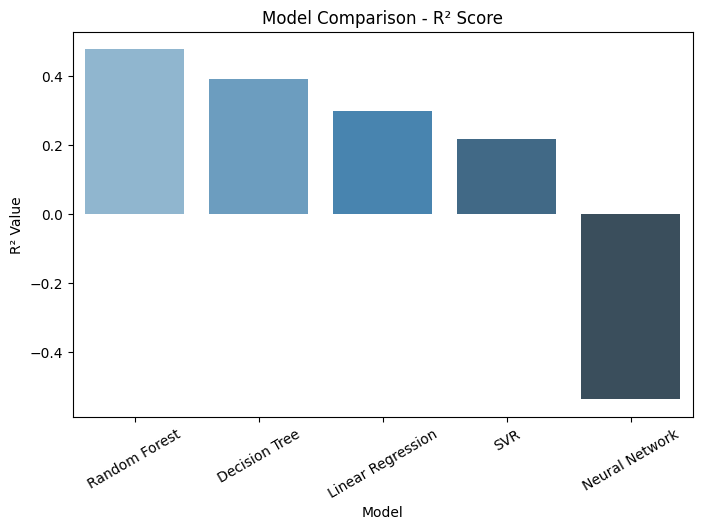

In [4]:
# 📊 R² Comparison
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='R2', data=results_sorted, palette='Blues_d')
plt.title("Model Comparison - R² Score")
plt.ylabel("R² Value")
plt.xlabel("Model")
plt.xticks(rotation=30)
plt.show()

C:\Users\Mohit\AppData\Local\Temp\ipykernel_24072\1776996.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=results_sorted, palette='Greens_d')


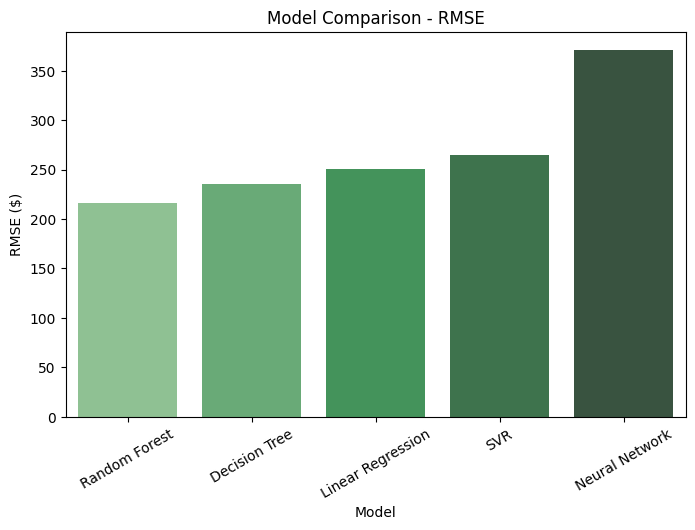

In [5]:
# 📉 RMSE Comparison
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='RMSE', data=results_sorted, palette='Greens_d')
plt.title("Model Comparison - RMSE")
plt.ylabel("RMSE ($)")
plt.xlabel("Model")
plt.xticks(rotation=30)
plt.show()

In [6]:
# 🧩 Identify best model automatically
best_model = results_sorted.iloc[0]
print(f"✅ Best Model: {best_model['Model']}")
print(f"   R²: {best_model['R2']:.3f}")
print(f"   RMSE: ${best_model['RMSE']:.2f}")

✅ Best Model: Random Forest
   R²: 0.476
   RMSE: $216.38
